# Parte 1
1. Escribe una función que acepte una cadena que contenga todas las letras del alfabeto excepto una y devuelva la letra que falta. Por ejemplo, la cadena the quick brown box jumps over a lazy dog contiene todas las letras del alfabeto excepto la letra f. La función debe tener una complejidad temporal de O(n). (1 punto)

In [2]:
def funcion(cadena)
  alf_min = ('a'..'z').to_a # Alfabeto de minusculas
  # Iterar sobre cada letra del alfabeto
  alf_min.each do |letra|
    # retorna la laletra por si no esta
    return letra if !cadena.downcase.include?(letra)
  end
  # si paso toda la cadena y no encontro una letra faltante 
  return "Todas las letras estan."
end

# Ejemplo
cadena = "the quick brown box jumps over a lazy dog"
letra = funcion(cadena)
puts "contiene todas las letras excepto la letra: #{letra}"


contiene todas las letras excepto la letra: f


2. Un árbol binario ordenado es aquel en el que cada nodo tiene un valor y hasta 2 hijos, cada uno de los cuales es también un árbol binario ordenado, y el valor de cualquier elemento del subárbol izquierdo de un nodo es menor que el valor de cualquier elemento en el subárbol derecho del nodo. Defina una clase colección llamada BinaryTree que ofrezca los métodos de instancia << (insertar elemento), empty? (devuelve cierto si el árbol no tiene elementos) y each (el iterador estándar que devuelve un elemento cada vez, en el orden que tú quieras). (2 puntos)

In [1]:

class BinaryTree
  # Define la estructura del nodo del árbol binario
  Node = Struct.new(:value, :left, :right)

  include Enumerable

  attr_accessor :root

  def initialize
    @root = nil
  end

  # Método para insertar un elemento en el árbol
  def <<(value)
    @root = insert_node(@root, value)
  end

  # Método para verificar si el árbol está vacío
  def empty?
    @root.nil?
  end

  # Implementación del método each para el módulo Enumerable
  def each(&block)
    in_order_traversal(@root, &block) if @root
  end

  private

  # Método para insertar un nodo en el árbol
  def insert_node(node, value)
    return Node.new(value, nil, nil) unless node

    # Si el valor es menor, se inserta en el subárbol izquierdo
    if value < node.value
      node.left = insert_node(node.left, value)
    # Si el valor es mayor, se inserta en el subárbol derecho
    elsif value > node.value
      node.right = insert_node(node.right, value)
    end

    node
  end

  # Método para recorrer el árbol en orden (traversal)
  def in_order_traversal(node, &block)
    # Recorre el subárbol izquierdo
    in_order_traversal(node.left, &block) if node.left

    # Llama al bloque con el valor del nodo actual
    yield(node.value)

    # Recorre el subárbol derecho
    in_order_traversal(node.right, &block) if node.right
  end
end




:in_order_traversal

In [11]:
# Ejemplo
tree = BinaryTree.new
[10, 5, 3, 7, 1, 4, 6, 8, 9].each { |value| tree << value }

puts "Elementos en el árbol en orden:"
tree.each { |value| puts value }

Elementos en el árbol en orden:
1
3
4
5
6
7
8
9
10


3. Extiende la clase de tu árbol binario ordenado para que ofrezca los siguientes métodos, cada uno de los cuales toma un bloque: include?(elt) (devuelve cierto si el árbol incluye a elt), all? (cierto si un bloque dado es cierto para todos los elementos), any? (cierto si un bloque dado es cierto para alguno de sus elementos), sort (ordena los elementos) (1 puntos)

In [2]:
class BinaryTree
  Node = Struct.new(:value, :left, :right)

  include Enumerable

  attr_accessor :root

  def initialize
    @root = nil
  end

  def <<(value)
    @root = insert_node(@root, value)
  end

  def empty?
    @root.nil?
  end

  def each(&block)
    in_order_traversal(@root, &block) if @root
  end

  # Método para verificar si el árbol incluye un elemento
  def include?(element)
    each { |value| return true if value == element }
    false
  end

  # Método para verificar si un bloque es verdadero para todos los elementos
  def all?(&block)
    each { |value| return false unless yield(value) }
    true
  end

  # Método para verificar si un bloque es verdadero para al menos un elemento
  def any?(&block)
    each { |value| return true if yield(value) }
    false
  end

  # Método para ordenar los elementos del árbol
  def sort
    sorted_values = []
    in_order_traversal(@root) { |value| sorted_values << value }
    sorted_values.sort
  end

  private

  # Método para insertar un nodo en el árbol
  def insert_node(node, value)
    return Node.new(value, nil, nil) unless node

    if value < node.value
      node.left = insert_node(node.left, value)
    elsif value > node.value
      node.right = insert_node(node.right, value)
    end

    node
  end

  # Método para recorrer el árbol en orden (traversal)
  def in_order_traversal(node, &block)
    return unless node

    in_order_traversal(node.left, &block) if node.left
    yield(node.value)
    in_order_traversal(node.right, &block) if node.right
  end
end



(irb):1: warning: already initialized constant #<Class:0x00007f048b2f4f18>::BinaryTree::Node
(irb):3: warning: previous definition of Node was here


:in_order_traversal

In [12]:
# Ejemplo de uso
tree = BinaryTree.new
[10, 5, 3, 7, 1, 4, 6, 8, 9].each { |value| tree << value }

# include?
puts "El árbol incluye el elemento 3: #{tree.include?(3)}"  
puts "El árbol incluye el elemento 9: #{tree.include?(9)}"  

# all?
puts "¿Todos los elementos son mayores que 0? #{tree.all? { |value| value > 0 }}"  
puts "¿Todos los elementos son mayores que 5? #{tree.all? { |value| value > 5 }}"  

# any?
puts "¿Algún elemento es igual a 3? #{tree.any? { |value| value == 3 }}"  
puts "¿Algún elemento es igual a 9? #{tree.any? { |value| value == 9 }}"  

# sort
sorted_values = tree.sort
puts "Elementos ordenados: #{sorted_values.join(', ')}"

El árbol incluye el elemento 3: true
El árbol incluye el elemento 9: true
¿Todos los elementos son mayores que 0? true
¿Todos los elementos son mayores que 5? false
¿Algún elemento es igual a 3? true
¿Algún elemento es igual a 9? true
Elementos ordenados: 1, 3, 4, 5, 6, 7, 8, 9, 10


# Parte 2 Introducción a Rails

1. En vez de redirigir a la acción Index tras un create exitoso, redirija a la acción show de la película recién creada. Pista: Puedes usar el método helper para URI movie_path, pero necesitarás darle un argumento para identificar la película. Para obtener este argumento, recuerda que si Movie.create se completa correctamente, devuelve el objeto recién creado, además de crearlo. (1 punto)

Primero vamos a 'app/contorller/Movies_controller.rb' para redirigir la accion show de la pelicula recien creada:
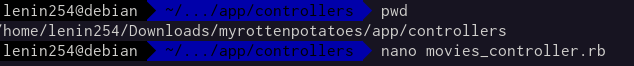
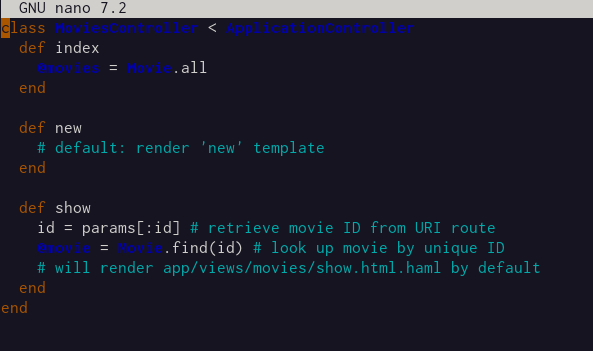   
Y agregamos el metodo create  
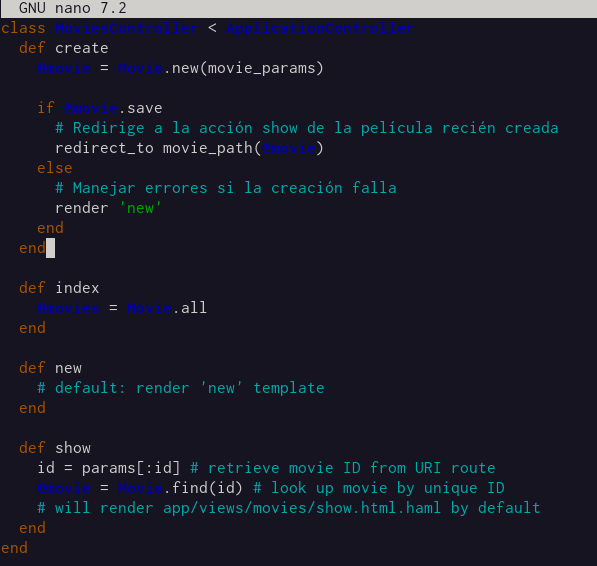 



2. El campo description de una película se creó como parte de la migración original, pero no se muestra y tampoco se puede editar. Realiza los cambios necesarios para que el campo de la descripción se vea y se pueda editar en las vistas de New y Edit. Pista: Debería cambiar sólo dos ficheros (1 punto).

3. Los métodos actuales del controlador no son muy robustos: si el usuario introduce de manera manual un URI para ver (Show) una película que no existe (por ejemplo /movies/99999), verá un mensaje de excepción horrible. Modifique el método show del controlador para que, si se pide una película que no existe, el usuario sea redirigido a la vista Index con un mensaje más amigable explicando que no existe ninguna película con ese ID. (Pista: Usa begin. . . rescue. . . end para recuperar el control en la excepción ActiveRecord::RecordNotFound). (1 punto)

# Parte 3

Verificamos las versiones:  
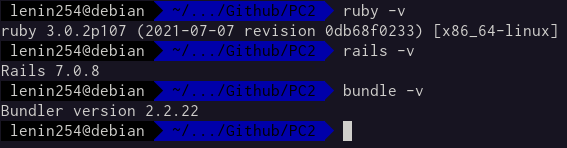  
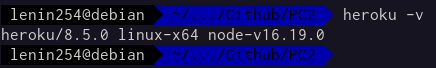  
**Crea una nueva aplicación Rails**
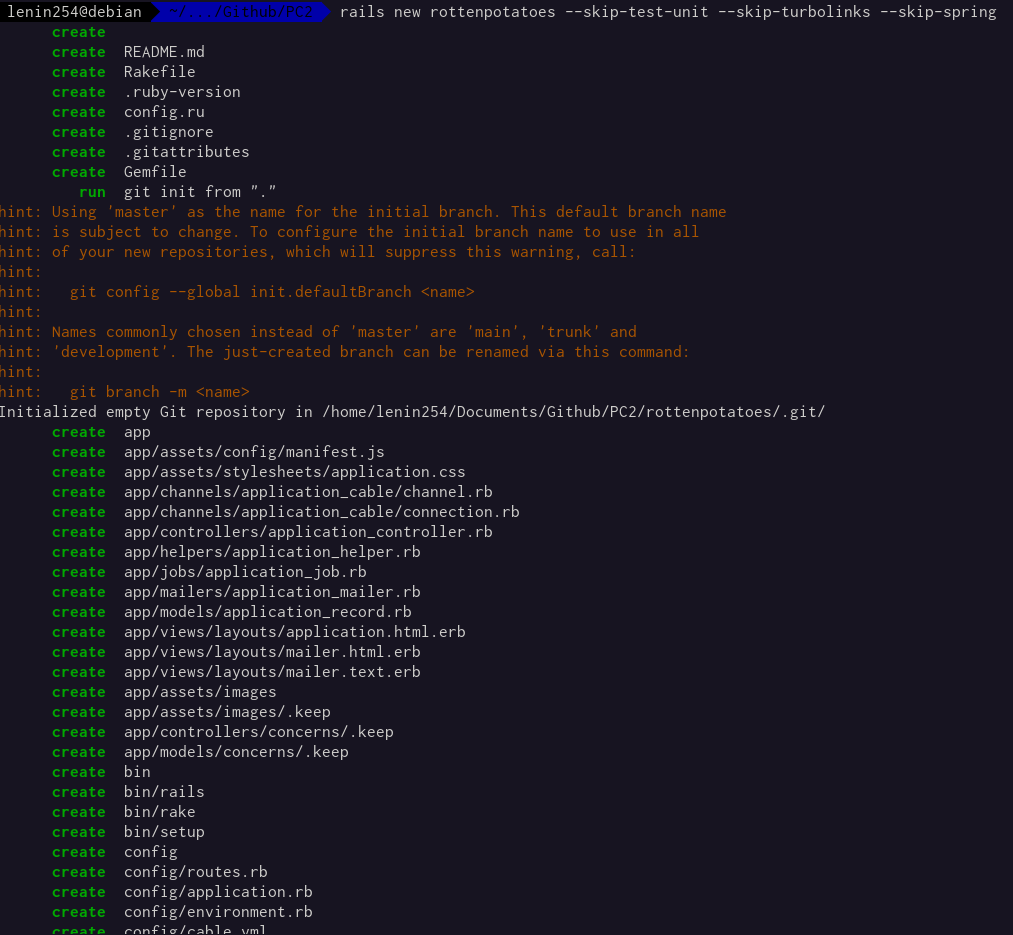  
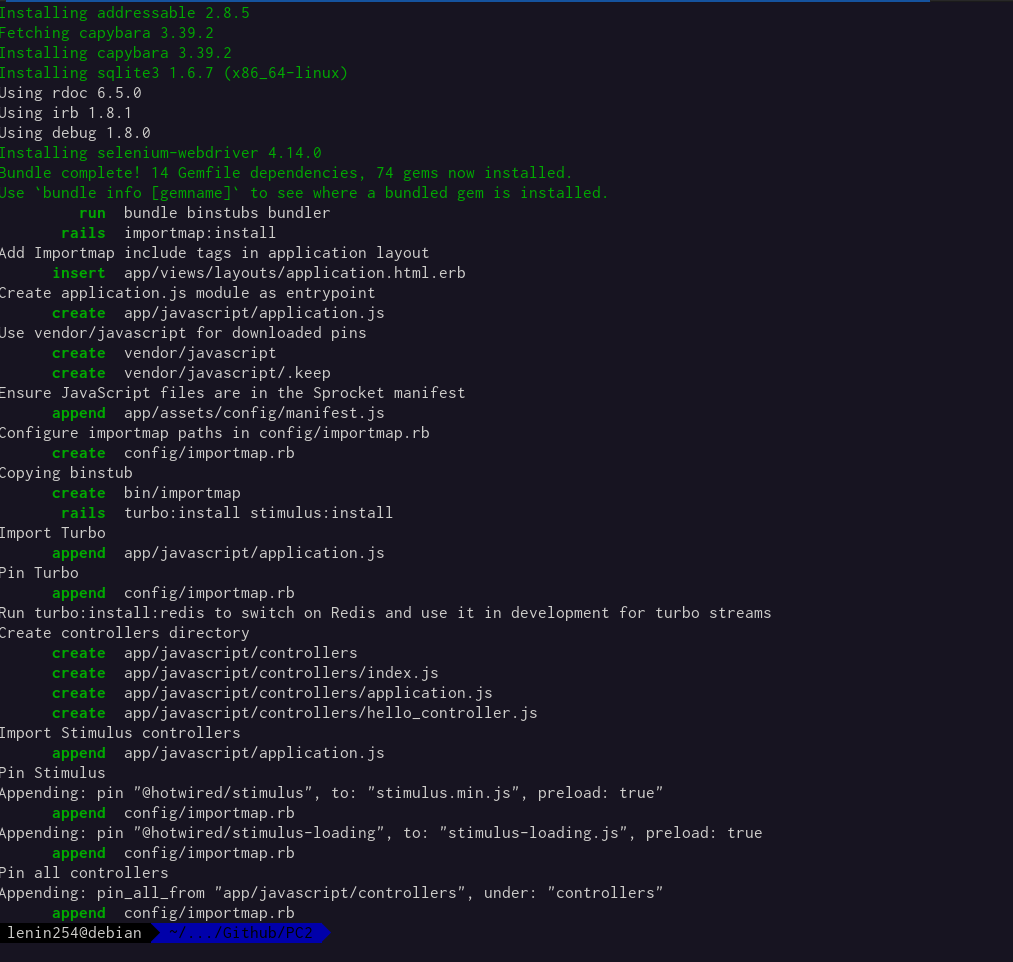  
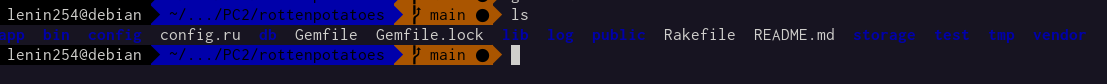  
¿Qué pasa con ese mensaje run bundle install?  
Este comando s corre en la creacion de arriba, indica que se esta instlando las gemas que se especifican en el archivo Gemfile.  
Ahora cambiamos al sqlite 1.3.0 en el gemfile:  
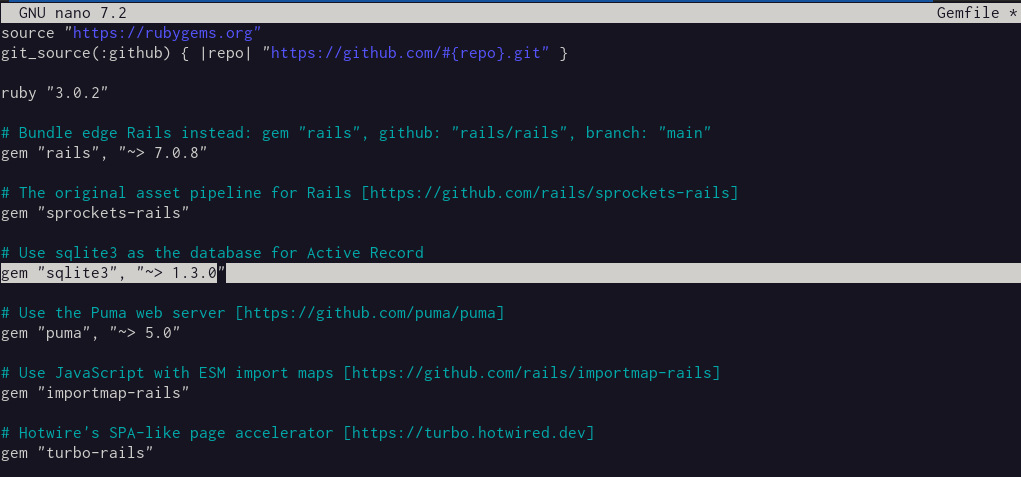  
Ahora ejecutamos bundle install y notaremos que la salida contiene:  
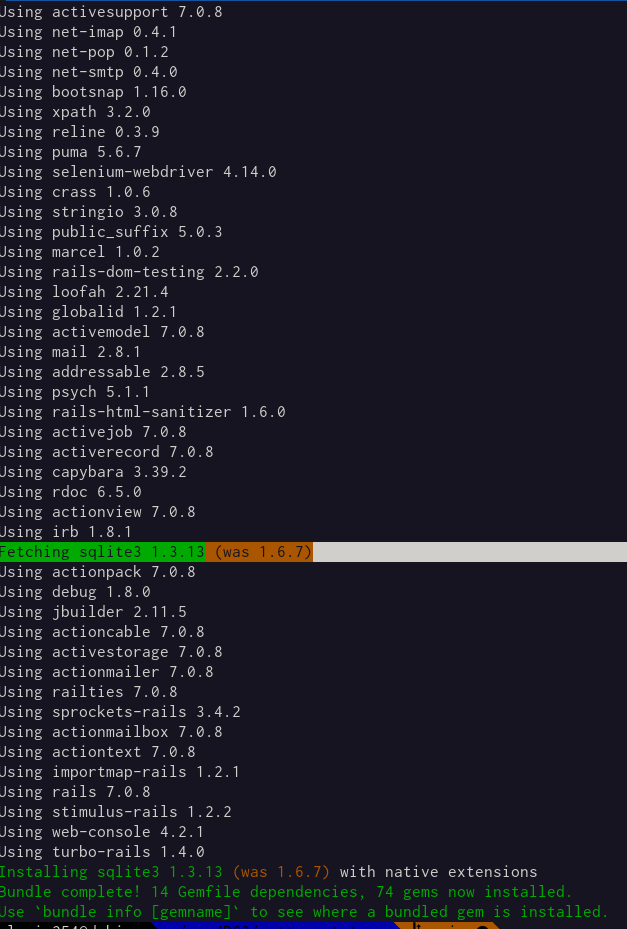  
Ejecutamos la aplicaion localmente:  
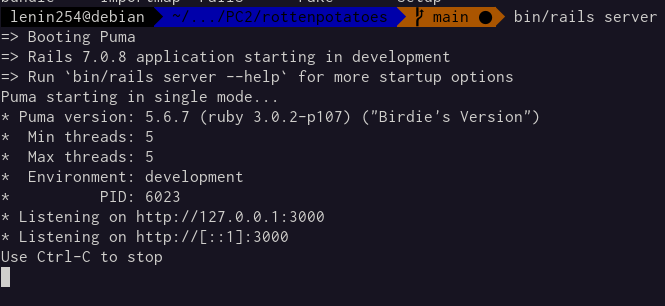  
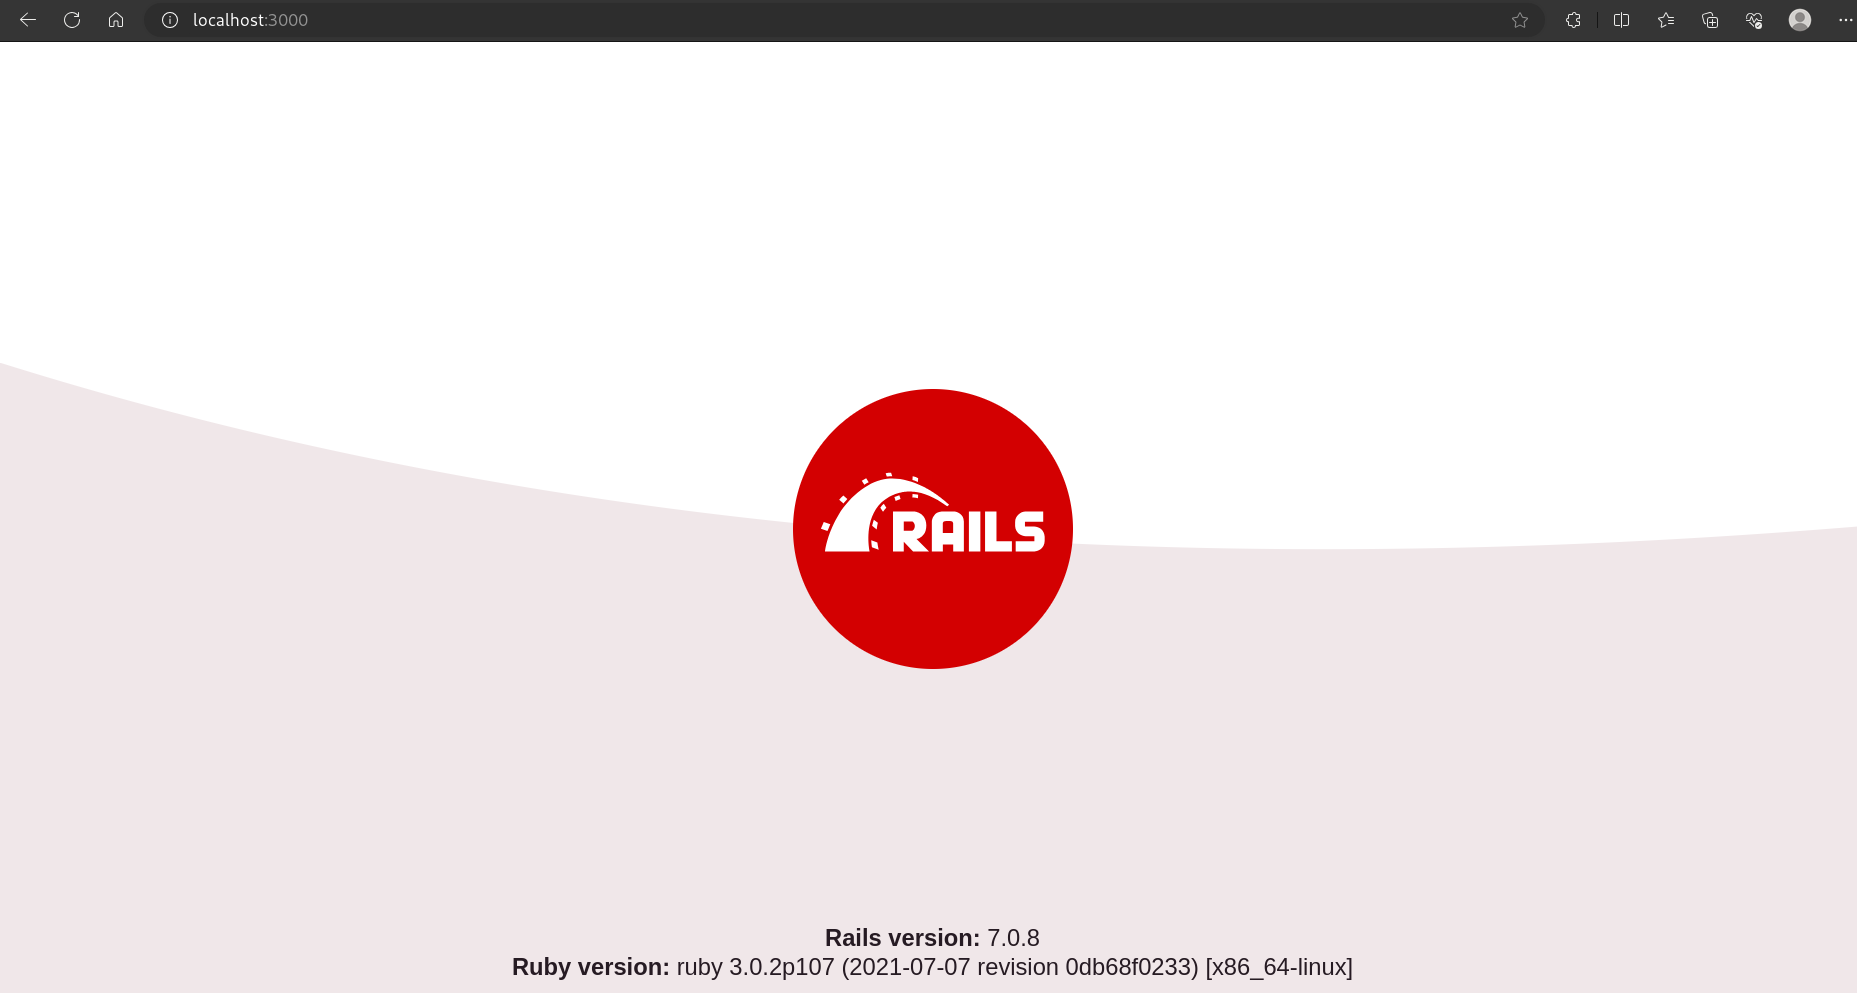  
**Crear y aplicar la migración**  
Ejecutamos el comando:  
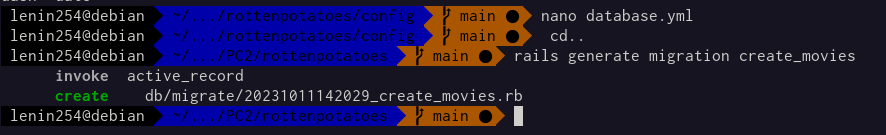  
buscamos el archivo:  
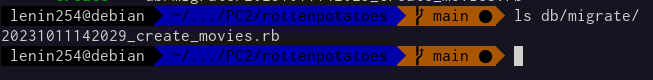  
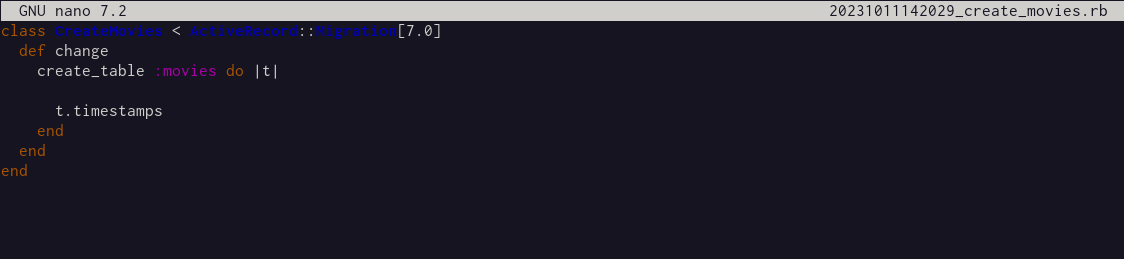  
Lo modificamos:  
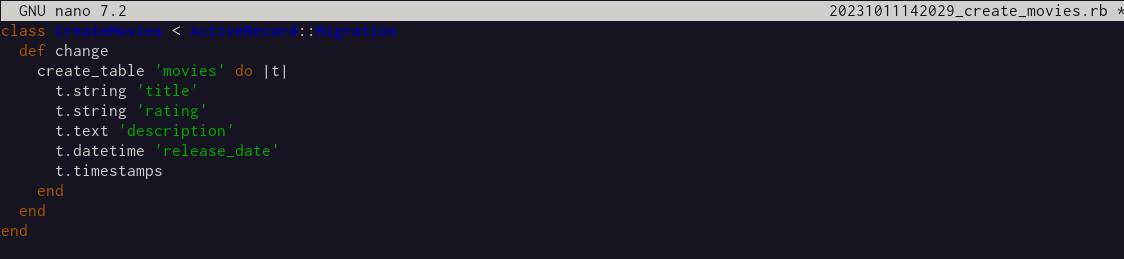  
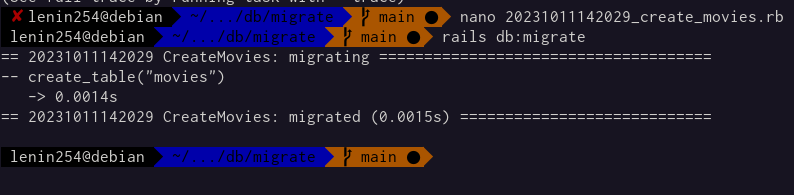  
**Crea el modelo inicial e inicializa la base de datos**  
crear un archivo app/models/movie.rb  
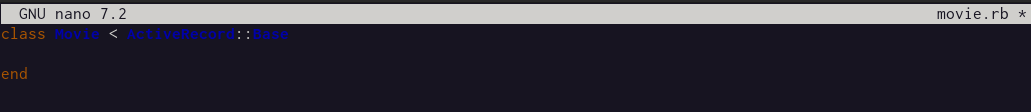  
Ejecutamos la consola:  
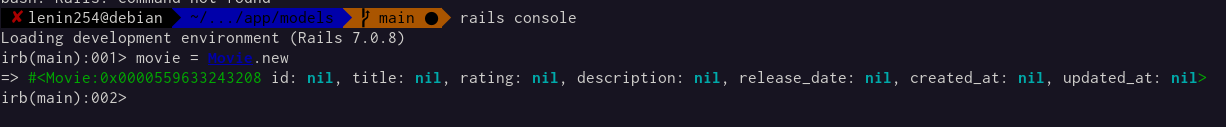  
Sembramos como indica:  
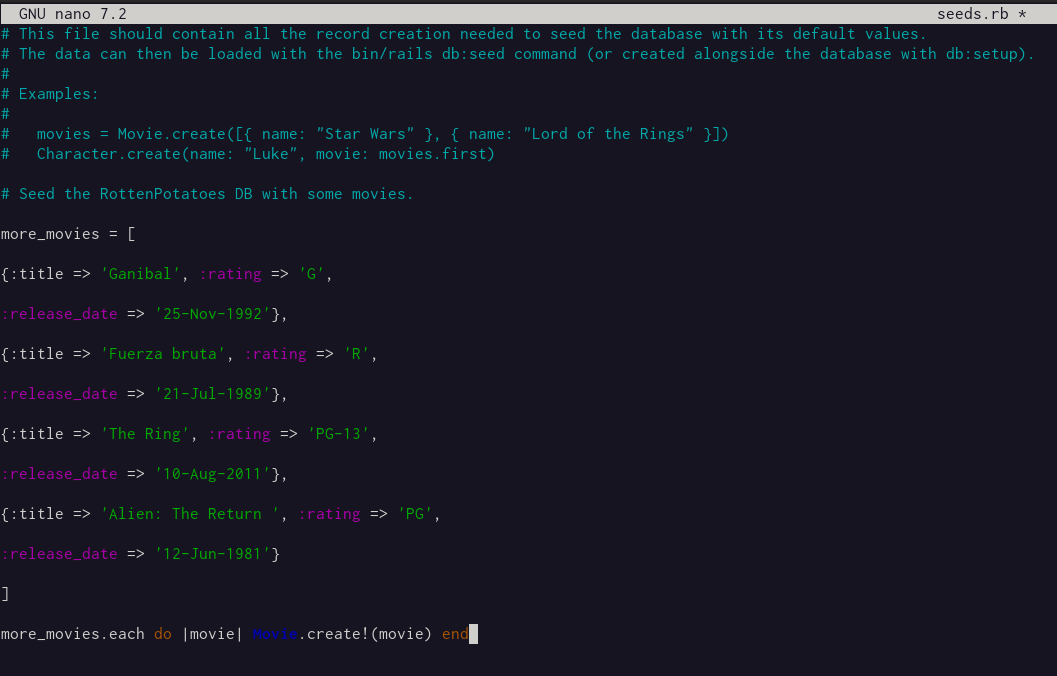  
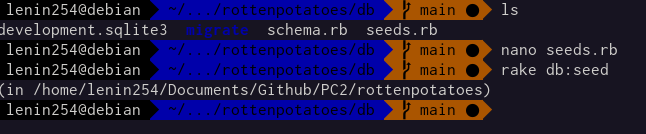  
comprobamos:  
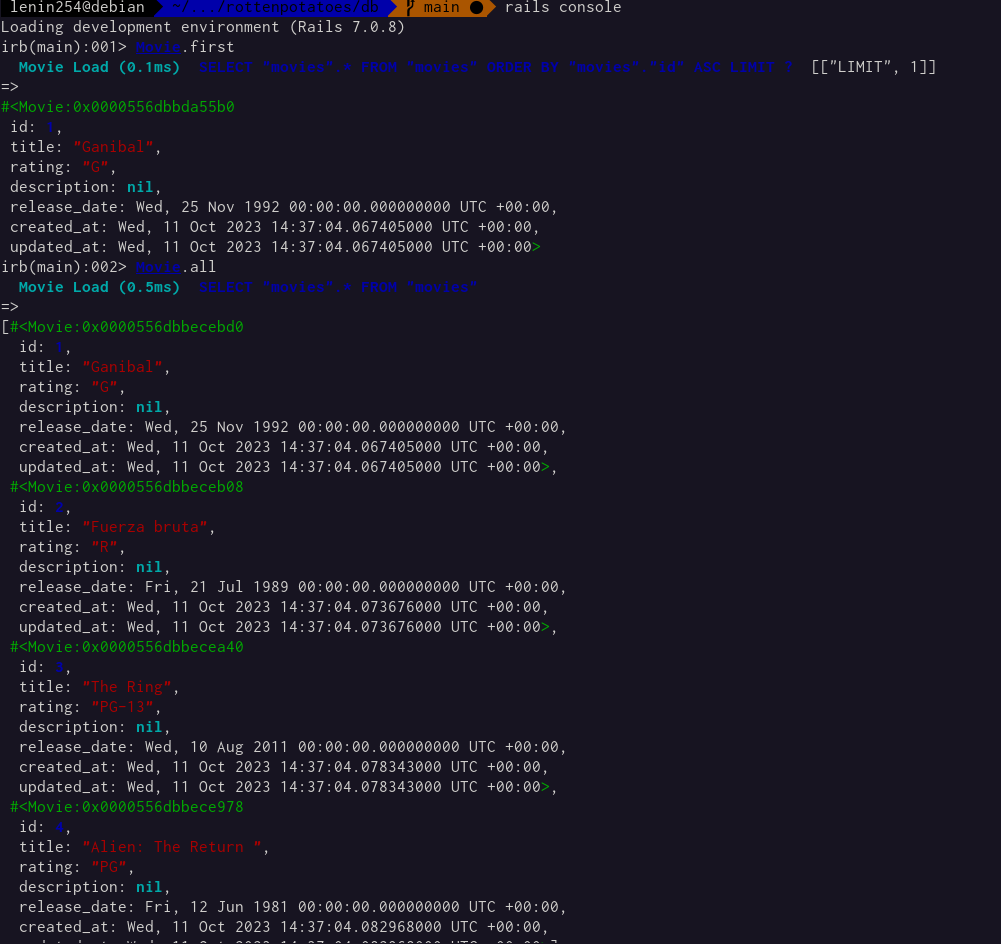  

**Parte 3: Crear rutas, acciones y vistas CRUD para películas**  
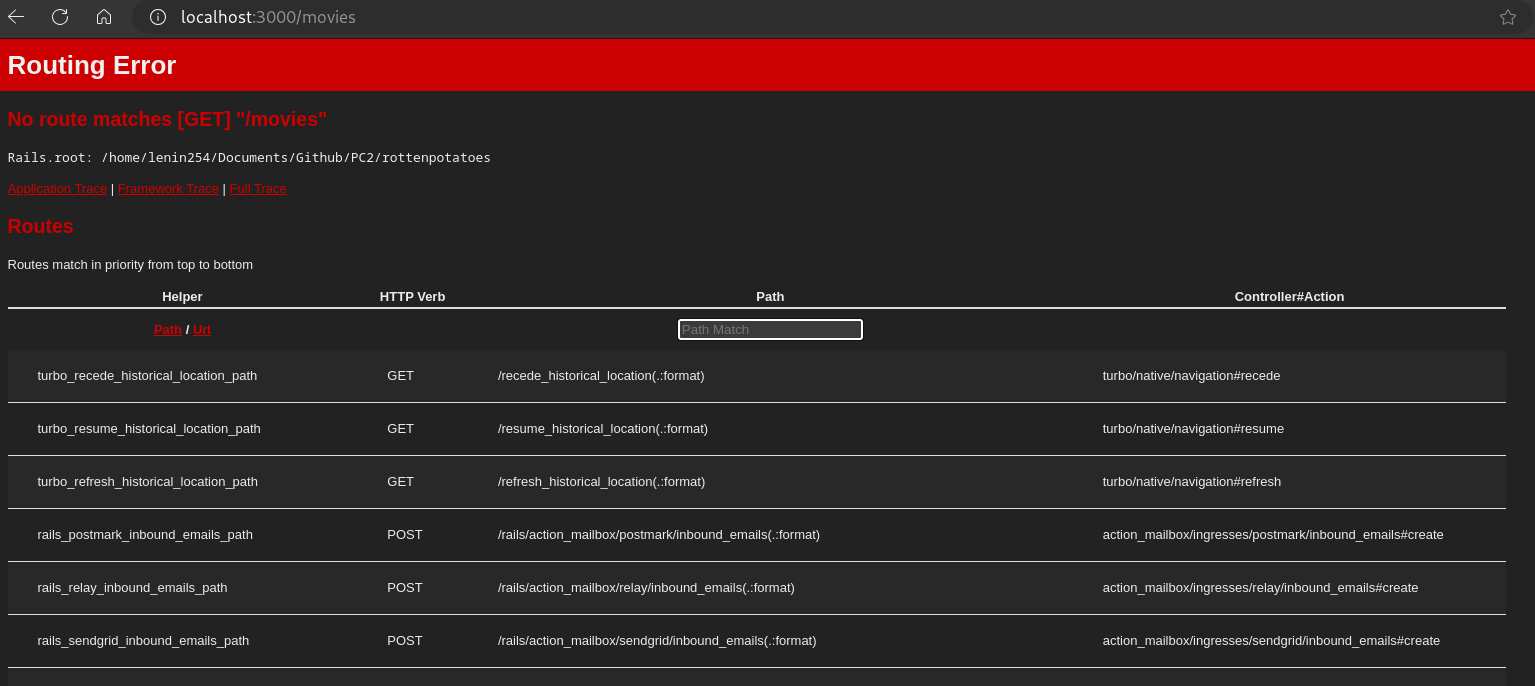
Crear rutas CRUD  
En el archivo de routes.rb  
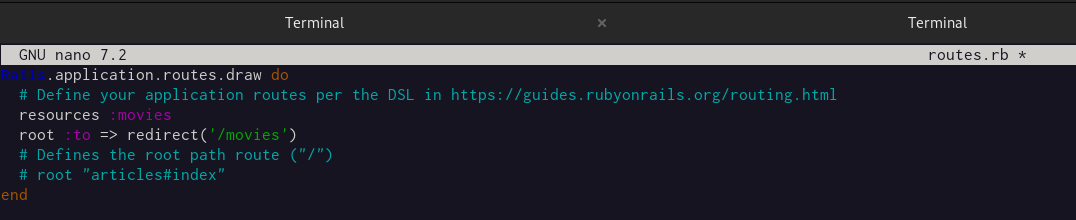  
Ahora manda a /movies  
**Crear acciones y vistas**
ejecutamos le comando dicho:  
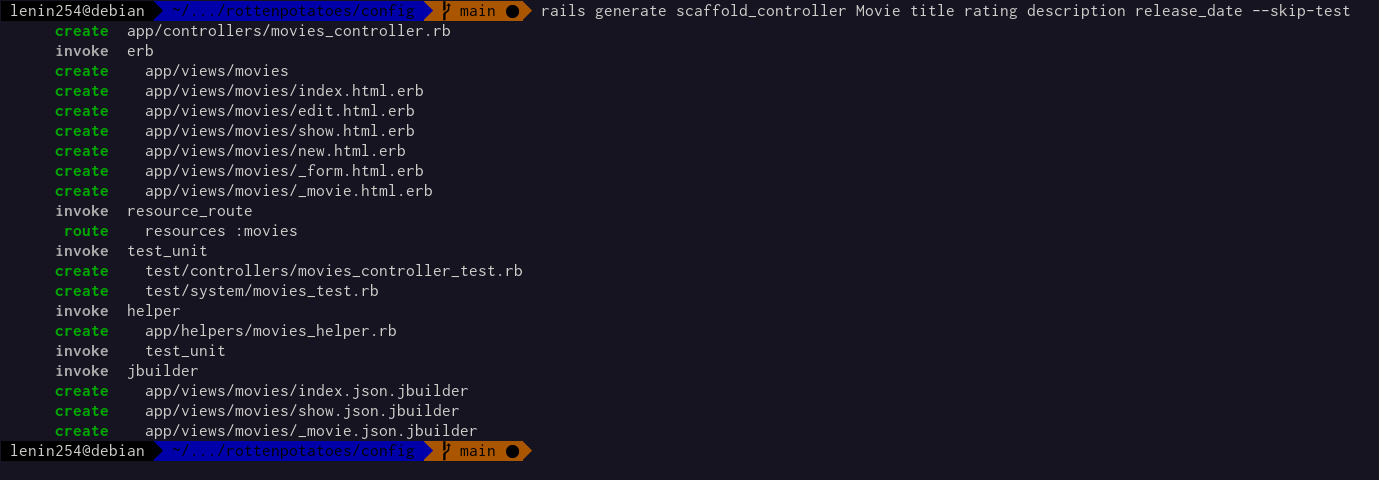  
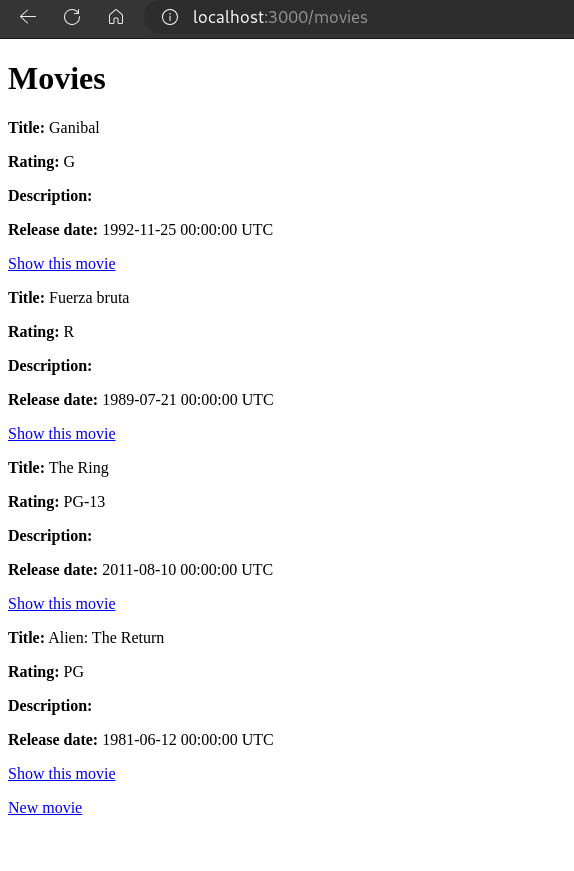  
**Cambiar la base de datos para producción.**
Agregamos al Gemdfile:  
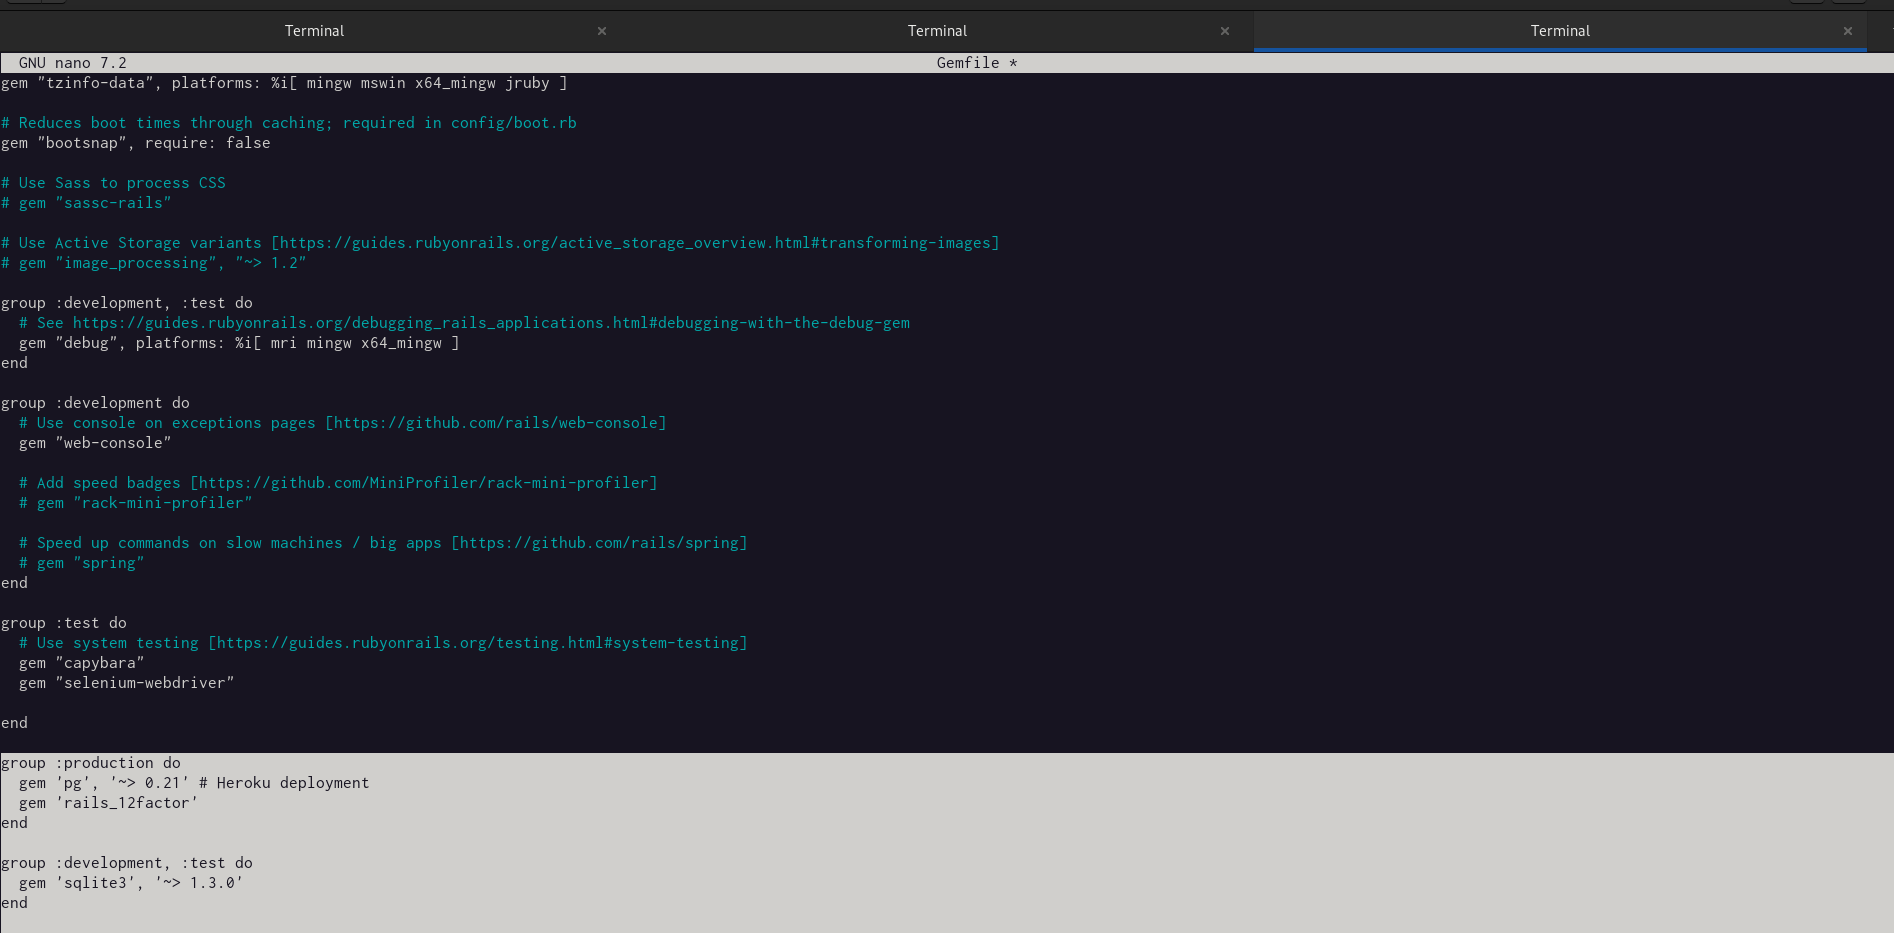  
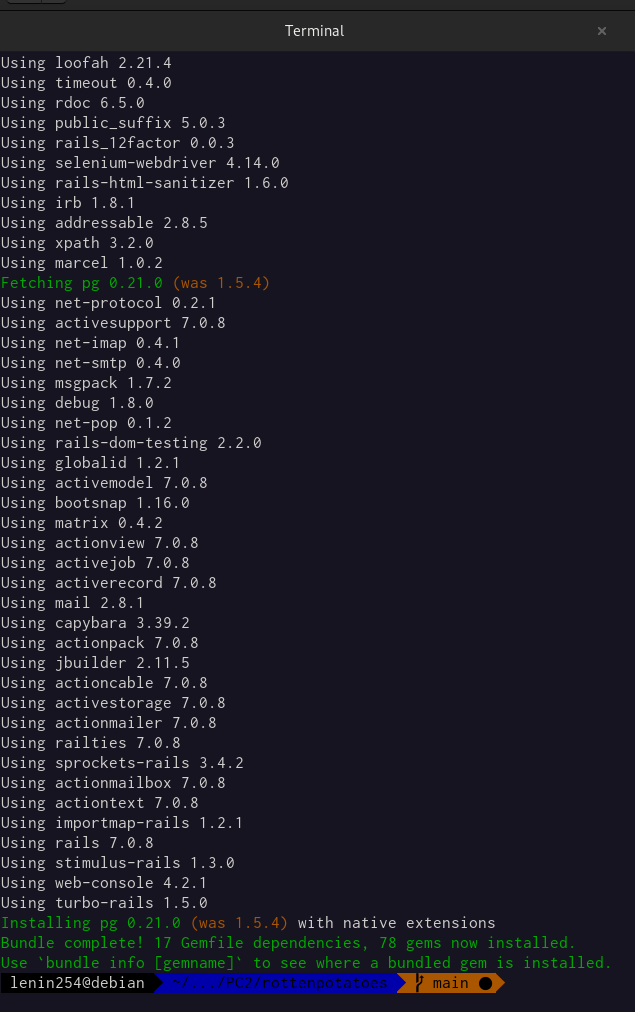  
Hacemos login a heroku:  
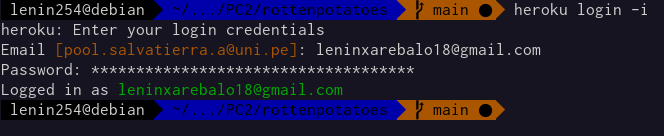  
Creamos el proyecto:  
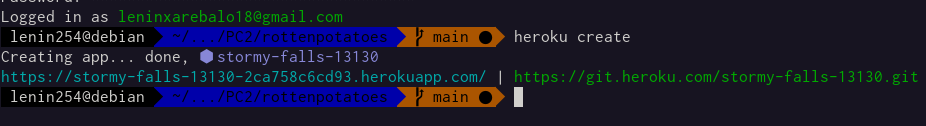  
luego de hacer un git add .  y commit. Lanzamos el proyecto:  
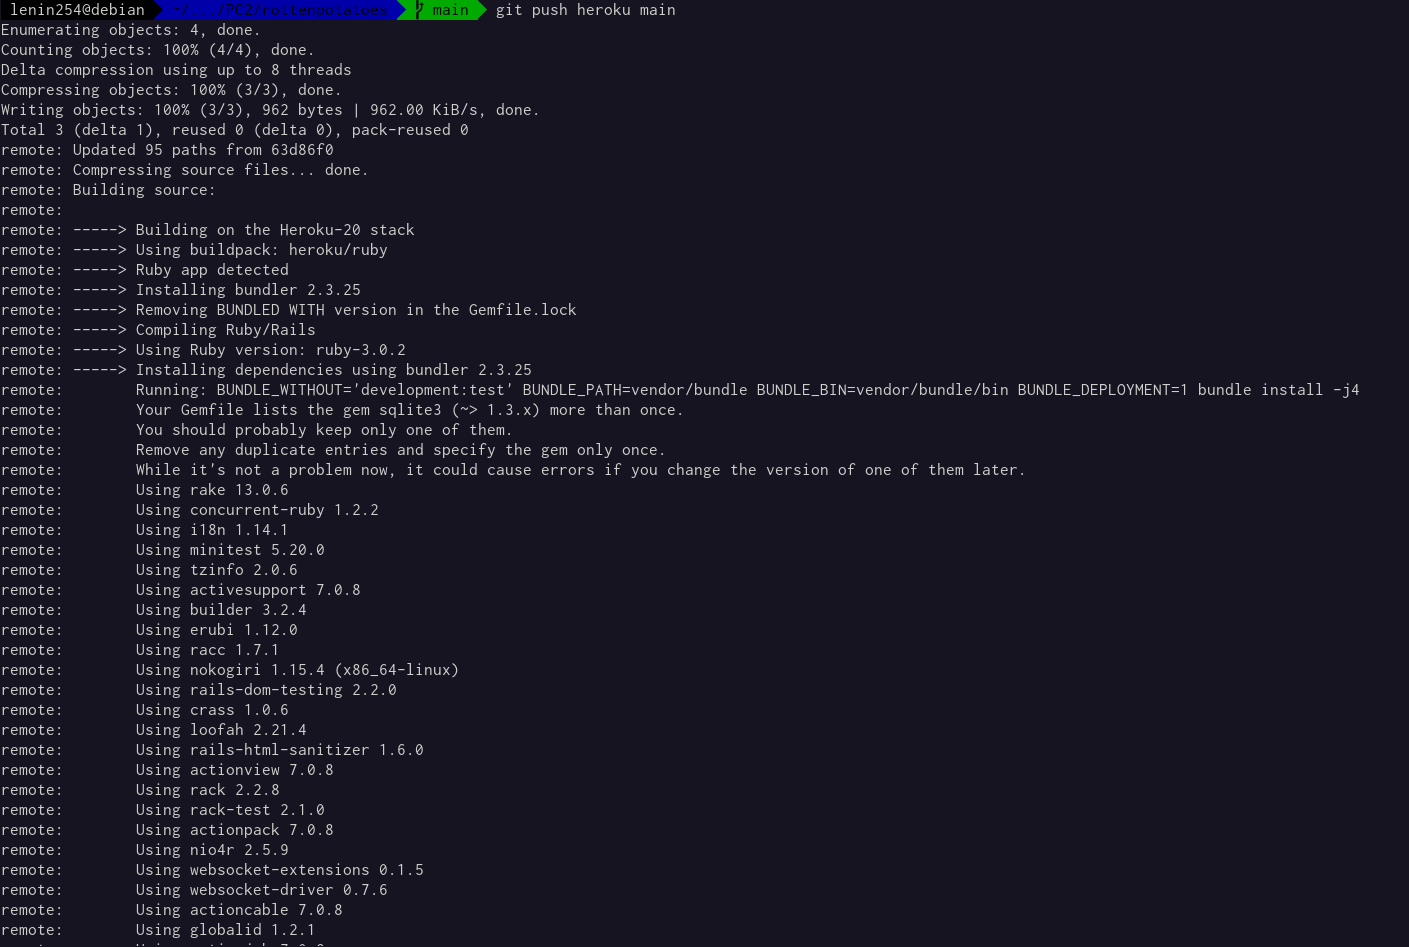  
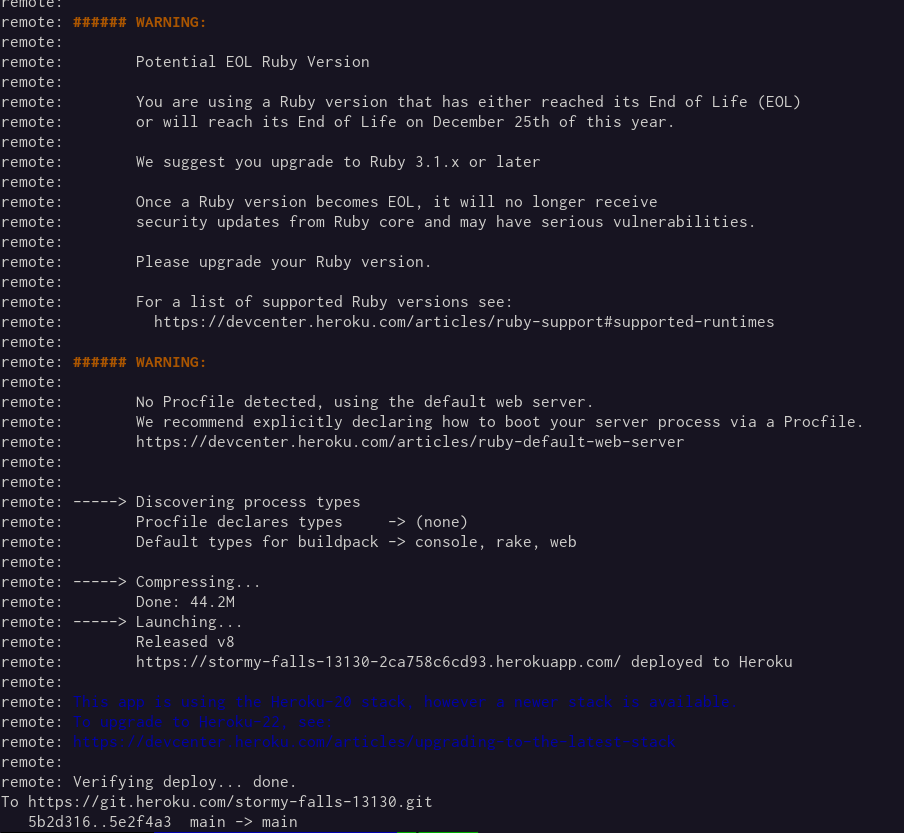  
Aqui ya deberiamos hacer la migracion de la DB a  heroku para que todo funcione:  
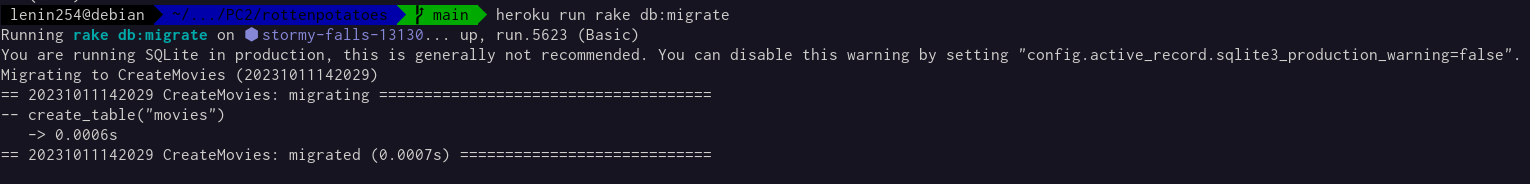  
Y en teoria deberia mostrarse en la pagina, la salida que teniamos, pero tengo un problema con SQLite3 que no ejecuta la migracion de forma correcta.  
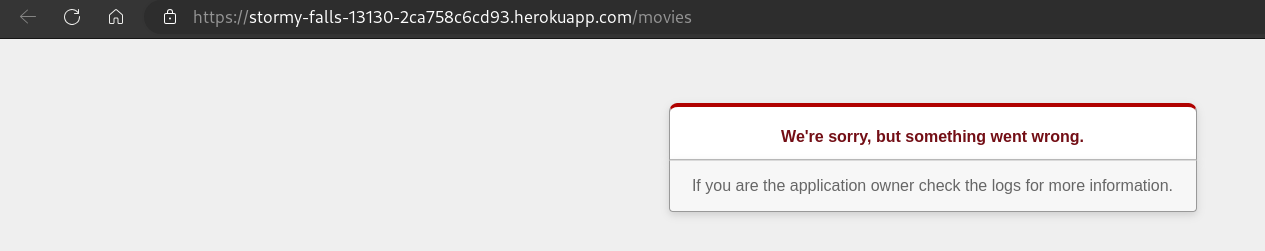  
Revisamos los logs para mirar el error:  
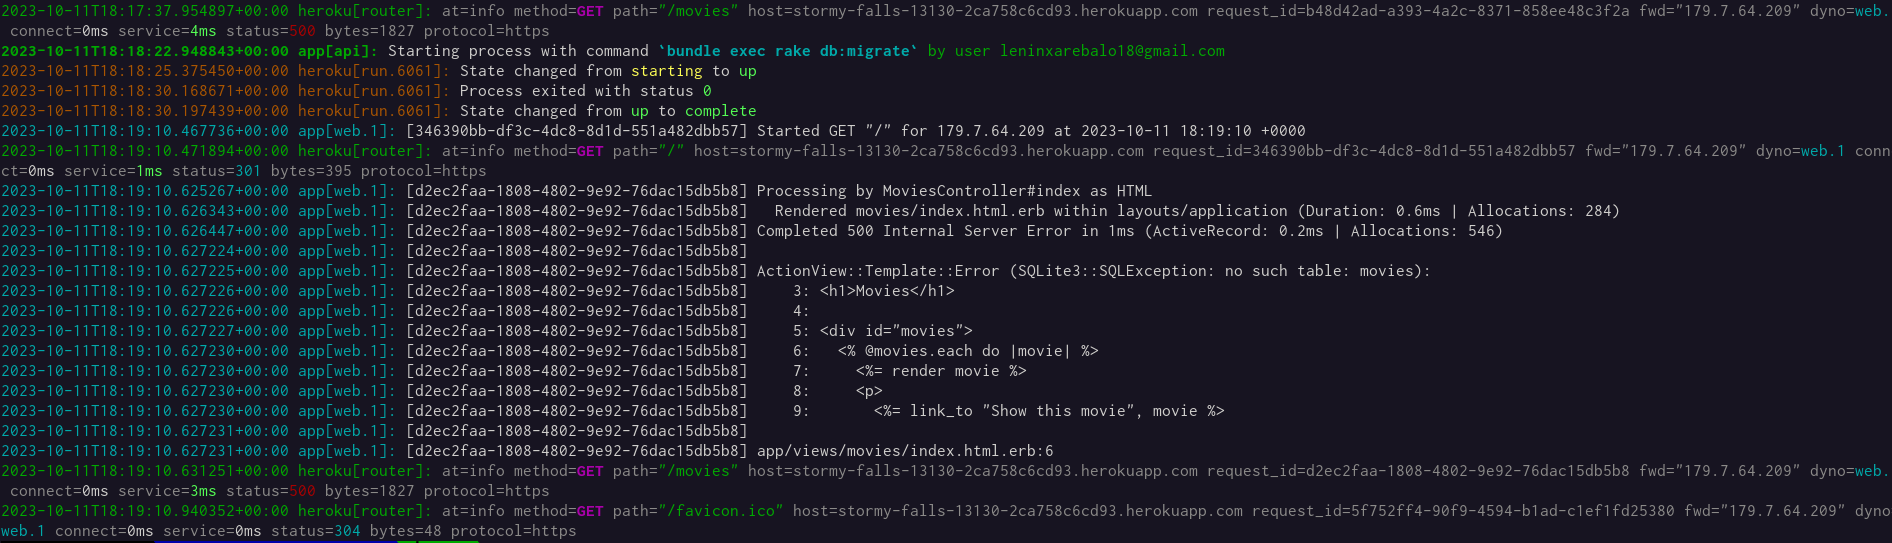  
nos dice que no se ha creado la tabla "movies" en la base de datos de produccion  
miramos el estado de la migracion  
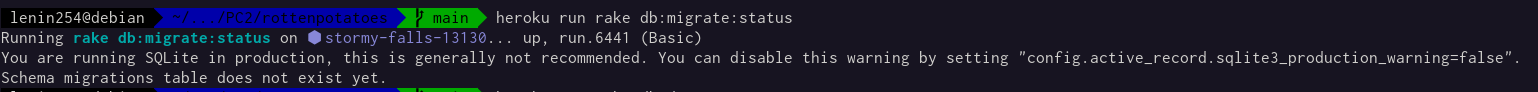  
Nos indica que no hay esquema de migracion, lo que hacemos es volver a cargar el esquema, pero resulta que seguimos con el mismo error:  
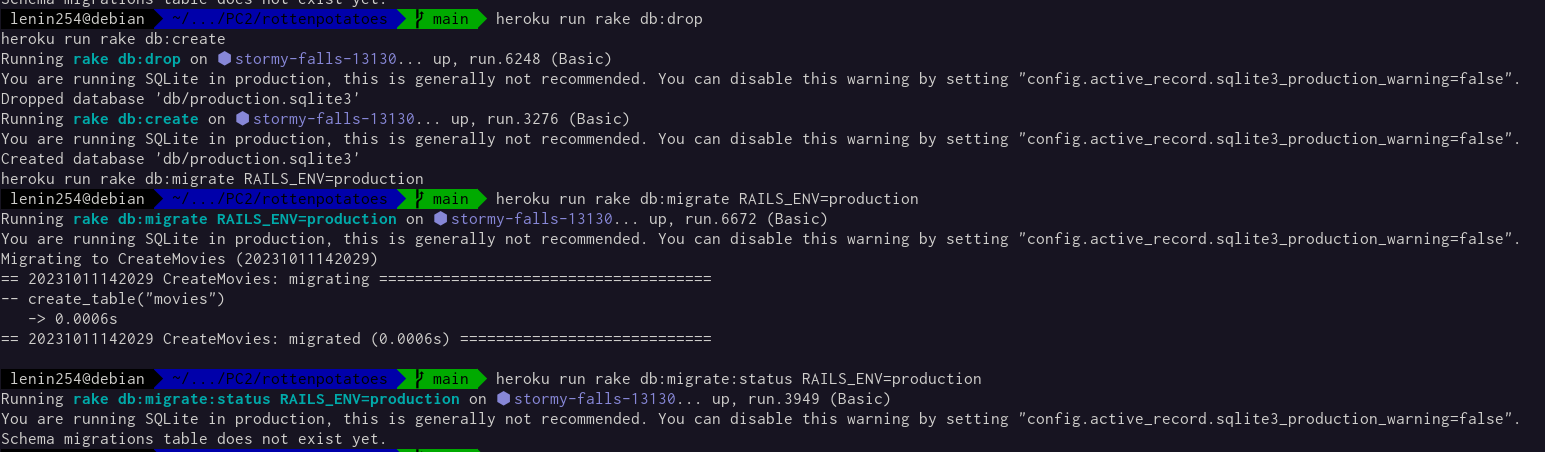  



